## Observation from Third network :From 3rd  network( 9925 accuracy in 40 epochs) I made a note that 
###* multiple time running networks will not help to improve acuracy as network starts overfitting.
###Some other concepts are required to solve overfitting problem and improve training and val accuracy
###* Parameters kept with same numbers as it made network to learn till 40 epochs to max achievable accuracy

### please Note as in first network i added comments in per block , here skipping:(

##TRY in this network
###1. Dropout
###2. Tuning dropout parameters less to more  from top to down layers 
### Dropouts should not use in near last layers
###3.  Gradually increase Batch size and epochs count

##Improvment from Third Network : With  8332 parameters in 50 epochs achieved 9948 val accuracy

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


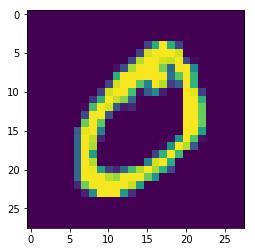

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', name ='FirstLayer', input_shape=(28,28,1))) # RF 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu' ,name ='SecondLayer')) # RF 5x5
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(14, 3, 3, activation='relu' , name ='ThirdLayer')) # RF 7x7
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # RF 14x14
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, activation='relu'))
model.add(Convolution2D(12, 3, 3, activation='relu' , name ='fourthThirdLayer'))
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Convolution2D(10, 3, 3, activation='relu' , name ='FifthLayer'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SixthLayer'))
model.add(Convolution2D(10, 3, 3, activation='relu' , name ='SeventhLayer'))
# model.add(Convolution2D(16, 3, 3, activation='relu' , name ='8Layer'))

model.add(Convolution2D(10, 1))#2


model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="FirstLayer", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="SecondLayer")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu", name="ThirdLayer")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="fourthThirdLayer")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstLayer (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_36 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_18 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
SecondLayer (Conv2D)         (None, 24, 24, 12)        1092      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 12)        0         
_________________________________________________________________
ThirdLayer (Conv2D)          (None, 22, 22, 14)        1526      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="FifthLayer")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="SixthLayer")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="SeventhLayer")`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## batchnormalization addition increased epochs time as see val acc is increasing so can be try if it further increased on no of epochs

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 398us/step - loss: 0.3847 - acc: 0.8735 - val_loss: 0.0746 - val_acc: 0.9770
Epoch 2/10
60000/60000 [==============================] - 23s 376us/step - loss: 0.0993 - acc: 0.9693 - val_loss: 0.0539 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 21s 344us/step - loss: 0.0772 - acc: 0.9761 - val_loss: 0.0517 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.0664 - acc: 0.9798 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0597 - acc: 0.9814 - val_loss: 0.0414 - val_acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0554 - acc: 0.9830 - val_loss: 0.0331 - val_acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 20s 340us/step - loss: 0.0509 - acc: 0.9839 - val_loss: 0.

In [0]:
print(score)

[0.029559062588436064, 0.9896]


In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  640/60000 [..............................] - ETA: 16s - loss: 0.0449 - acc: 0.9828

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 10s 174us/step - loss: 0.0339 - acc: 0.9887 - val_loss: 0.0291 - val_acc: 0.9916
Epoch 2/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0349 - acc: 0.9888 - val_loss: 0.0363 - val_acc: 0.9887
Epoch 3/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0345 - acc: 0.9889 - val_loss: 0.0306 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.0262 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0306 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0324 - acc: 0.9896 - val_loss: 0.0269 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0317 - acc: 0.9900 - val_loss: 0.0285 - val_acc: 0.9923
Epoch 8/10
60000/60000 [==============

In [0]:
print(score)

[0.025815005174069667, 0.9917]


In [0]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1792/60000 [..............................] - ETA: 5s - loss: 0.0180 - acc: 0.9939

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 6s 101us/step - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0248 - val_acc: 0.9930
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0232 - acc: 0.9923 - val_loss: 0.0282 - val_acc: 0.9921
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0285 - val_acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0227 - acc: 0.9928 - val_loss: 0.0240 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0235 - acc: 0.9925 - val_loss: 0.0246 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0252 - acc: 0.9916 - val_loss: 0.0263 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.0237 - acc: 0.9923 - val_loss: 0.0280 - val_acc: 0.9920
Epoch 8/10
60000/60000 [=====================

In [0]:
# model.compile(loss='categorical_crossentropy',
# #               optimizer=keras.optimizers.Adam(lr=0.00001),
#               metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=256, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2048/60000 [>.............................] - ETA: 3s - loss: 0.0223 - acc: 0.9912

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 4s 63us/step - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0205 - val_acc: 0.9941
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0189 - acc: 0.9937 - val_loss: 0.0219 - val_acc: 0.9947
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0176 - acc: 0.9942 - val_loss: 0.0218 - val_acc: 0.9932
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0205 - acc: 0.9935 - val_loss: 0.0224 - val_acc: 0.9937
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0230 - val_acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0185 - acc: 0.9942 - val_loss: 0.0218 - val_acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0235 - val_acc: 0.9928
Epoch 8/10
60000/60000 [============================

In [0]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10,validation_data=(X_test,Y_test), verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 2560/60000 [>.............................] - ETA: 3s - loss: 0.0250 - acc: 0.9906

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 50us/step - loss: 0.0156 - acc: 0.9949 - val_loss: 0.0217 - val_acc: 0.9942
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0170 - acc: 0.9946 - val_loss: 0.0206 - val_acc: 0.9936
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0155 - acc: 0.9953 - val_loss: 0.0226 - val_acc: 0.9941
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0162 - acc: 0.9946 - val_loss: 0.0214 - val_acc: 0.9943
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0215 - val_acc: 0.9941
Epoch 6/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0158 - acc: 0.9950 - val_loss: 0.0212 - val_acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0221 - val_acc: 0.9942
Epoch 8/10
60000/60000 [============================

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.51205566e-12 6.75397985e-07 1.05889370e-07 4.08880078e-06
  2.31549592e-07 1.51425283e-09 1.05805102e-16 9.99994516e-01
  6.52628729e-10 3.38623749e-07]
 [3.94797752e-07 8.45393242e-06 9.99967456e-01 2.98632017e-07
  1.20950710e-06 1.85855651e-08 3.16353226e-06 3.93741516e-07
  1.85483386e-05 4.02060110e-08]
 [8.09299711e-11 9.99987960e-01 4.82156359e-08 2.95471381e-08
  2.87236361e-07 3.93355862e-07 9.17587284e-10 1.12560774e-05
  1.11563225e-09 5.45822232e-09]
 [9.99999404e-01 1.26883408e-13 1.82295228e-08 4.21577412e-10
  9.45501056e-12 1.99477523e-09 5.43011311e-07 2.81010604e-10
  4.80997180e-08 1.26287081e-09]
 [4.82932271e-13 4.40141784e-10 2.56039123e-09 4.22055755e-13
  9.99548137e-01 8.76318740e-10 1.46488599e-10 1.66523080e-08
  1.38350828e-07 4.51756729e-04]
 [6.03773032e-10 9.99956727e-01 2.62566402e-07 1.10552435e-07
  8.18209060e-07 5.57711985e-07 1.29488842e-09 4.15829818e-05
  4.73957762e-09 3.47916398e-08]
 [2.74168353e-14 1.34394440e-07 1.06766436e-08 1.34908274e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'FirstLayer'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()